In [156]:
colors = [
    '#E69F00',  
    '#56B4E9',  
    '#009E73',  
    '#F0E442',
    '#D55E00', 
    '#CC79A7', 
    '#7D0CFF',  
    '#D80036',  
    '#1A5309',  
    "#DA9D9D", 
    '#DF6535',  
    '#8ADD91',  
    '#1E90FF',  
    '#FF69B4',  
    '#444444'   
]

In [157]:
import pandas as pd
df = pd.read_csv('../data/preprocessed_df.csv')

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)  
df.head(3)

,female,gender_not_specified,male,not_cis,asexual,bi/pan/demi_sexual/queer,heterosexual,homosexual,income,romantic_relationship_intent,education_level_grouped,location_density,air_zodiac_sign,earth_zodiac_sign,fire_zodiac_sign,water_zodiac_sign,age,bio_length,likes_received,emoji_usage_rate,message_sent_count,interest_lifestyle,interest_health,interest_creativity,interest_education_culture,interest_entertainment,interest_social
0,0,1,0,0,0,0,0,1,2,0,1,2,0,1,0,0,56,44,173,0.36,75,0.333333,0.333333,0.000000,0.333333,0.000000,0.0
1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,40,301,107,0.42,35,0.333333,0.000000,0.333333,0.333333,0.000000,0.0
2,0,0,0,1,0,1,0,0,0,2,2,1,0,0,1,0,30,309,91,0.41,33,0.000000,0.000000,0.333333,0.333333,0.333333,0.0


In [158]:
features_to_scale = ['income', 'romantic_relationship_intent', 'education_level_grouped','location_density',
                     'age', 'bio_length',	'likes_received',	'emoji_usage_rate',	'message_sent_count',
                     'interest_creativity',	'interest_health',	'interest_lifestyle',	'interest_education_culture',
                     'interest_entertainment',	'interest_social']
other_features = [col for col in df.columns if col not in features_to_scale]

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_to_scale])

Adding the interests as features

In [160]:
from sklearn.cluster import KMeans
import numpy as np

X = np.hstack((X_scaled, df[other_features].values))

Trying with the same amount of clusters from the baseline

In [161]:
kmeans = KMeans(n_clusters= 7, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

print(df['cluster'].value_counts())

cluster
0    9479
4    9358
5    7526
2    7254
1    7211
3    5092
6    4080
Name: count, dtype: int64


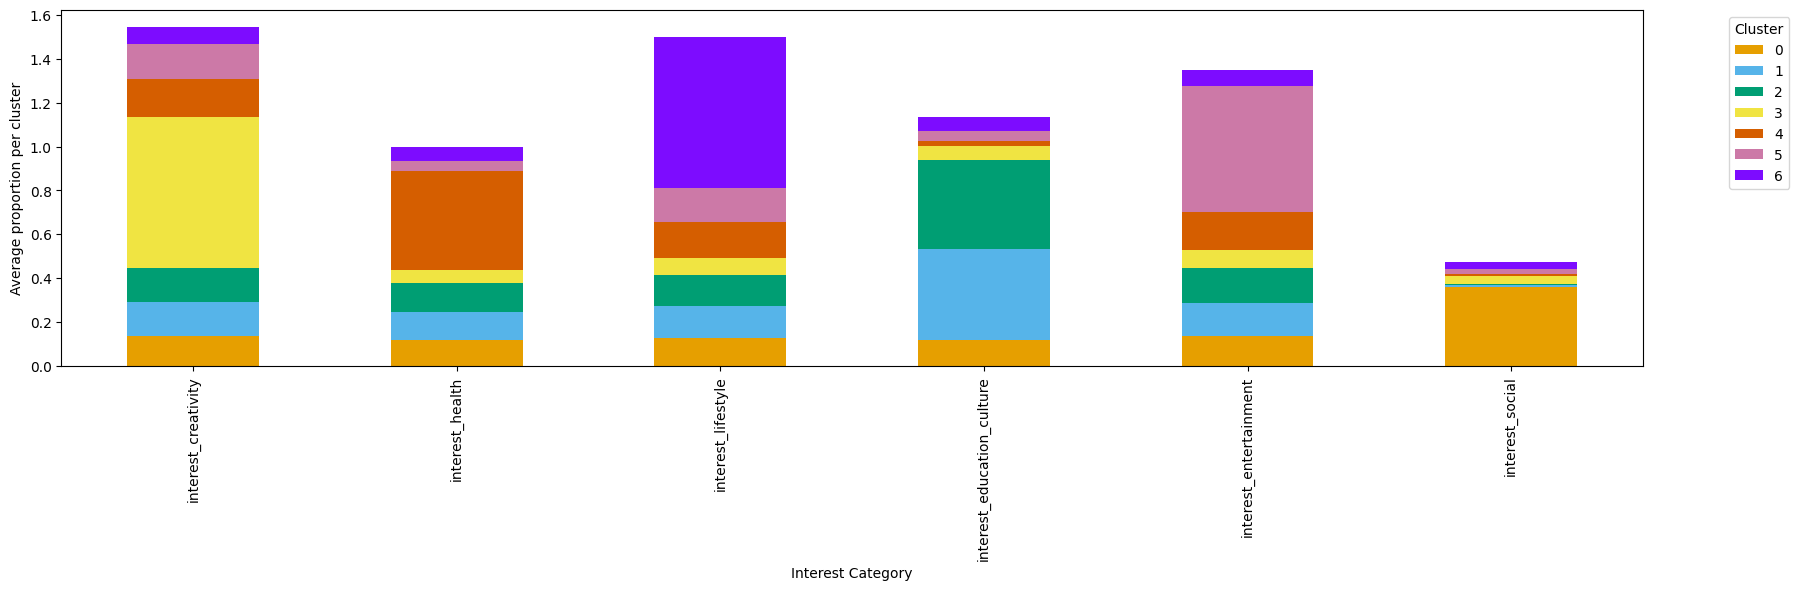

In [162]:
import matplotlib.pyplot as plt
interest_cols = ['interest_creativity',	'interest_health',	'interest_lifestyle',	'interest_education_culture',
                    'interest_entertainment', 'interest_social']


interest_per_cluster = df.groupby('cluster')[interest_cols].mean()
percent = interest_per_cluster.T

percent.plot(kind='bar', stacked=True, figsize=(18, 6), color=colors)
plt.ylabel('Average proportion per cluster')
plt.xlabel('Interest Category')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

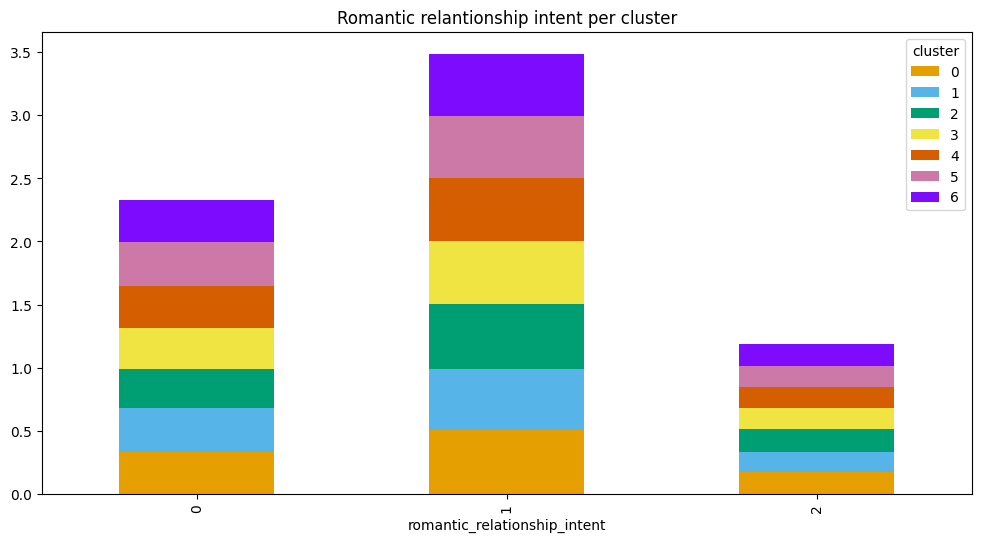

In [163]:
df['romantic_relationship_intent'] = df['romantic_relationship_intent'].astype(str)
pd.crosstab(df['cluster'], df['romantic_relationship_intent'], normalize='index').T.plot(
    kind='bar', stacked=True, figsize=(12,6), color=colors
)
plt.title("Romantic relantionship intent per cluster")
plt.show()

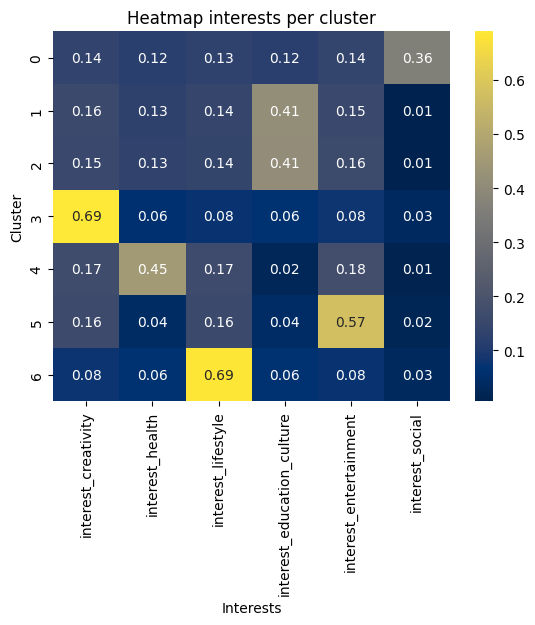

In [164]:
import seaborn as sns
clusters = df.groupby('cluster')[interest_cols].mean()
sns.heatmap(clusters, cmap='cividis', annot=True, fmt=".2f")
plt.title('Heatmap interests per cluster')
plt.ylabel('Cluster')
plt.xlabel('Interests')
plt.show()

In [165]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['cluster'])
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.065


<b>Clustering with Interest Columns</b></br>

For the second approach, I used KMeans again with the same number of clusters (7), but this time including the interest-related columns. While the number of clusters remained the same as in the baseline, the distribution across clusters changed. Cluster 0 now contains a much larger proportion of users, more than double the size of the smallest cluster (Cluster 6), unlike the baseline where cluster sizes were much more balanced.

When analyzing the interest columns, a clear pattern emerges: each cluster shows has a predominant specific interest type, while the other clusters remain relatively balanced. The only exception is the "education/culture" interest, where two clusters (1 and 2) share dominance. Here's a breakdown:

Cluster 0 – Social interests

Clusters 1 & 2 – Education/Culture

Cluster 3 – Creativity

Cluster 4 – Health

Cluster 5 – Entertainment

Cluster 6 – Lifestyle

This alignment makes sense given there are 7 clusters and 6 main interest categories—each interest tends to dominate one cluster. This also shows that adding the interest features made an important change on the grouping. 

As for romantic relationship intent, no meaningful variation was observed across clusters. The data remains very homogeneous in this regard.

The Silhouette Score increased slightly to 0.065, suggesting a marginal improvement in cluster separation. This is likely due to the addition of interest-related features, which allowed the algorithm to find slightly more distinct groupings. However, the score still reflects weak clustering overall.

Trying with smaller clusters

In [166]:
kmeans = KMeans(n_clusters= 10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

print(df['cluster'].value_counts())

cluster
1    6476
7    6342
4    6338
3    5865
5    5046
8    5026
6    4916
0    3530
9    3296
2    3165
Name: count, dtype: int64


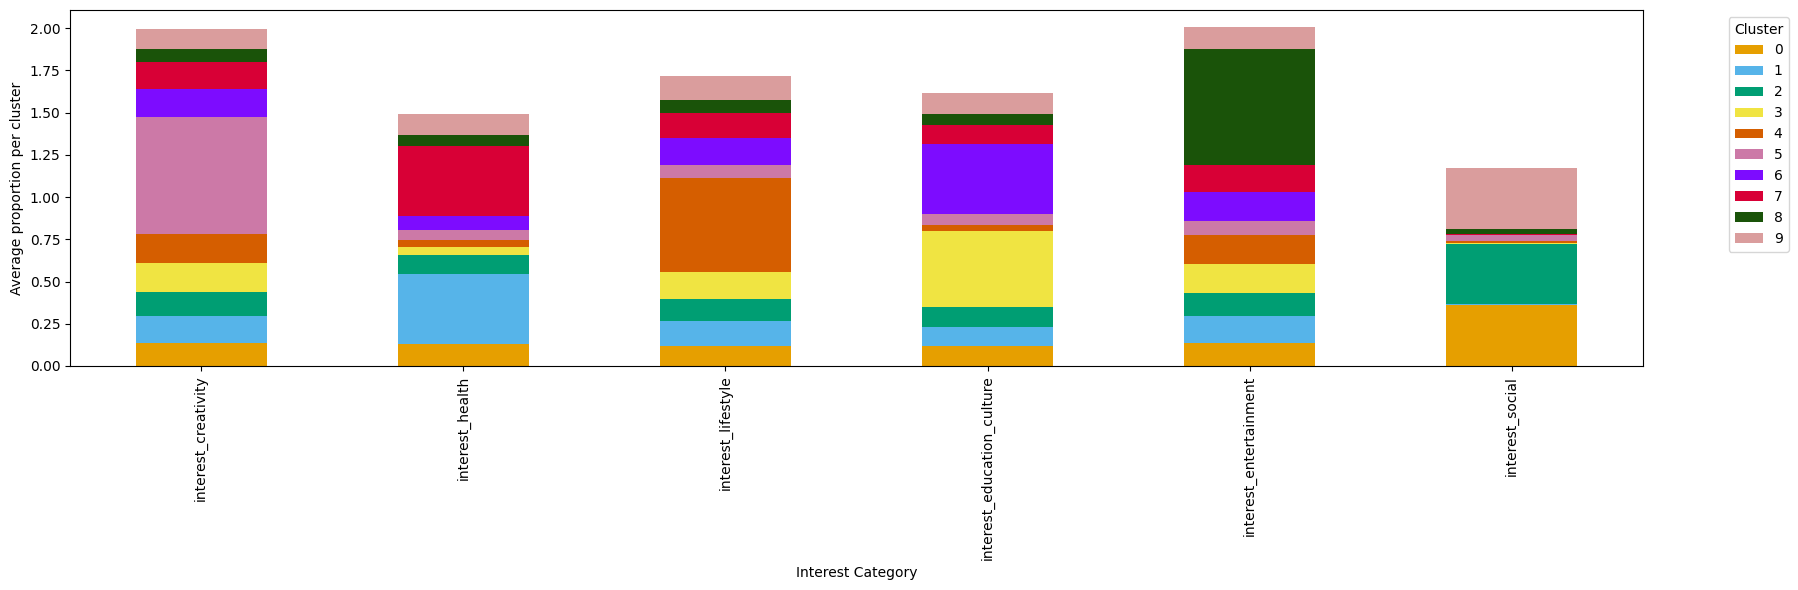

In [167]:
interest_cols = ['interest_creativity',	'interest_health',	'interest_lifestyle',	'interest_education_culture',
                    'interest_entertainment', 'interest_social']

interest_per_cluster = df.groupby('cluster')[interest_cols].mean()
percent = interest_per_cluster.T

percent.plot(kind='bar', stacked=True, figsize=(18, 6), color=colors)
plt.ylabel('Average proportion per cluster')
plt.xlabel('Interest Category')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

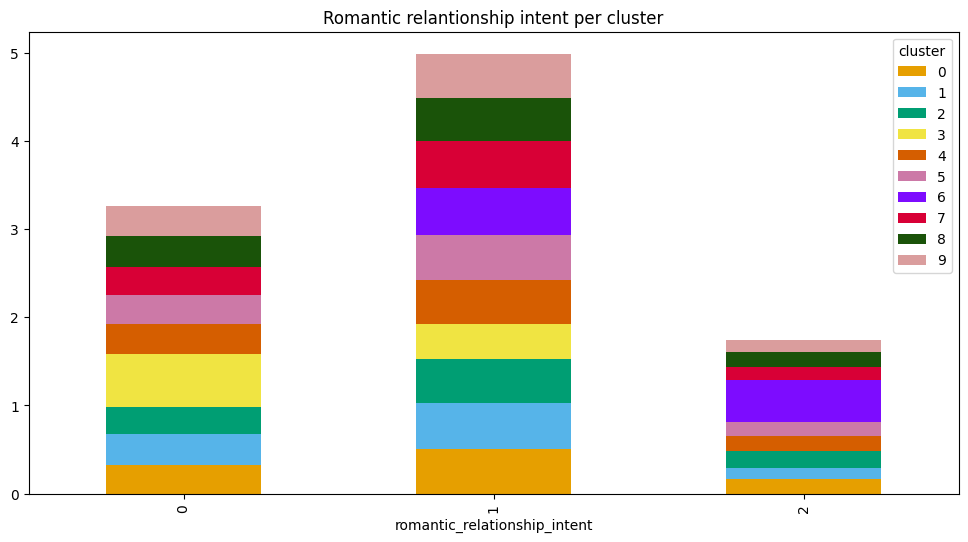

In [168]:
df['romantic_relationship_intent'] = df['romantic_relationship_intent'].astype(str)
pd.crosstab(df['cluster'], df['romantic_relationship_intent'], normalize='index').T.plot(
    kind='bar', stacked=True, figsize=(12,6), color=colors
)
plt.title("Romantic relantionship intent per cluster")
plt.show()

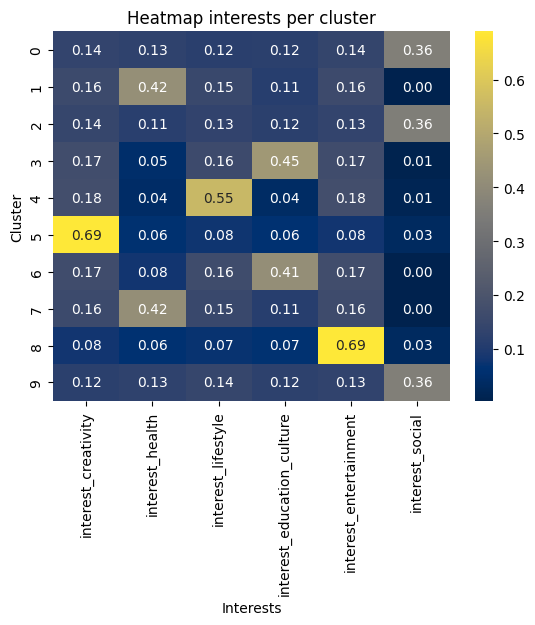

In [169]:
clusters = df.groupby('cluster')[interest_cols].mean()
sns.heatmap(clusters, cmap='cividis', annot=True, fmt=".2f")
plt.title('Heatmap interests per cluster')
plt.ylabel('Cluster')
plt.xlabel('Interests')
plt.show()

In [170]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['cluster'])
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.056


<b>Clustering with Interests Columns – 10 Clusters</b></br>

In this third approach, I applied KMeans again, this time increasing the number of clusters to 10 while keeping the interest columns.

The distribution of data across clusters remained similar to the previous configuration. The biggest cluster (Cluster 1)still contains roughly twice the number of users as the smallest one (Cluster 2), showing the same proportion as before.

When analyzing the interest features, the same pattern from the 7-cluster model doesn’t hold as clearly. While we still see 1, 2 or 3 interest categories dominating each cluster, the dominance is more diluted. Additionally, the non-dominant interest scores are now less evenly distributed, suggesting more variation within clusters.

Here's a breakdown of the dominant interest per cluster:

Cluster 0 – Social

Cluster 1 – Health

Cluster 2 – Social

Cluster 3 – Education/Culture

Cluster 4 – Lifestyle

Cluster 5 – Creativity

Cluster 6 – Education/Culture

Cluster 7 – Health

Cluster 8 – Entertainment

Cluster 9 – Social

Regarding romantic relationship intentions, the clusters still appear mostly homogeneous. However, we can start to see some groupings on that feature. Cluster 6 shows a slight tendency toward users interested in romantic relationships (appearing on serious and casual relationships and not being present on the non romantic column), and Cluster 3 leans slightly toward people not interested in romantic relationships (appering only in non romantic and casual). 

The Silhouette Score dropped back to 0.056, which is the same as the initial baseline without interest columns.